In [1]:
import tensorflow_core as tf
import numpy as np
import matplotlib.pyplot as plt

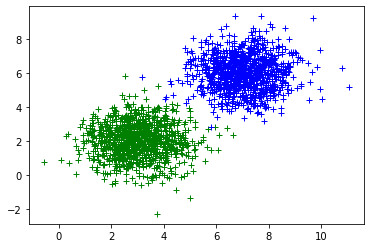

In [2]:
learning_rate = 0.1
training_epochs = 2000

def sigmoid(x): # helper  calculate sigmoid
    return 1. / (1. + np.exp(-x))

# 1st gang, 1st cluster, around (3, 2) 
x1_label1 = np.random.normal(3, 1, 1000) # latitude
x2_label1 = np.random.normal(2, 1, 1000) # longitude

# 2nd gang, 2nd cluster, around (7, 6) 
x1_label2 = np.random.normal(7, 1, 1000) # latitude
x2_label2 = np.random.normal(6, 1, 1000) # longitude

x1s = np.append(x1_label1, x1_label2)
x2s = np.append(x2_label1, x2_label2)

# define classification
# label1 = 0
# label2 = 1
ys = np.array([0.] * len(x1_label1) + [1.] * len(x1_label2))

# show cluster
plt.plot(x1_label1, x2_label1, 'g+')
plt.plot(x1_label2, x2_label2, 'b+')
plt.show()

In [3]:
X1 = tf.placeholder(tf.float32, shape=(None,), name="x1")
X2 = tf.placeholder(tf.float32, shape=(None,), name="x2")
Y = tf.placeholder(tf.float32, shape=(None,), name="y")
w = tf.Variable([0., 0., 0.], name="w", trainable=True)

def model(X2, X1, w):  # sigmoid model
    return tf.div(
        1.,
        tf.add(1., tf.exp(-1 * (w[2] * X2 + w[1] * X1 + w[0])),
    ))

y_model = model(X2, X1, w)

cost = tf.reduce_mean(-Y * tf.log(y_model) - (1 - Y) * tf.log(1 - y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

prev_err = 0
for epoch in range(training_epochs):
    err, _ = sess.run([cost, train_op], feed_dict={X1: x1s, X2: x2s, Y: ys})
    
    if abs(prev_err - err) < 0.0001: 
        break
    prev_err = err

w_val = sess.run(w)

sess.close()

print("===== DONE TRAINING =====")

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
===== DONE TRAINING =====


In [4]:
# problem output
print(f"Crime probability: {sigmoid(4 * w_val[2] + 6 * w_val[1] + w_val[0])}")

Crime probability: 0.6942285826062984


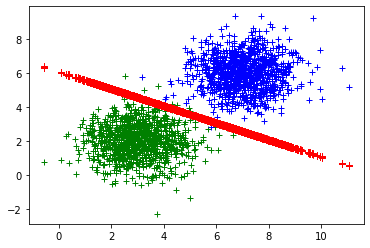

In [5]:
# find median graph

x1_crime_long_4, x2_crime_long_4 = [], []
for x1 in x1s:
    for x2 in x2s:
        z = sigmoid(x2 * w_val[2] + x1 * w_val[1] + w_val[0])
        if (abs(z - 0.5) < 0.01):
            x1_crime_long_4.append(x1)
            x2_crime_long_4.append(x2)

plt.plot(x1_label1, x2_label1, 'g+')
plt.plot(x1_label2, x2_label2, 'b+')
plt.plot(x1_crime_long_4, x2_crime_long_4, 'r+')
plt.savefig('2d_crime.png')

In [6]:
from IPython.display import display, Image, HTML

html1 = """
    <img style="float: left;" 
        src="./2d_crime.png" width="450px"/>
"""
HTML(html1)